# Exercícios


## Aula 04.03


In [1]:
import pandas as pd  # noqa E402

numeros = [i for i in range(11)]
letras = [chr(i + 65) for i in range(11)]
nome_coluna = ['N']

df = pd.DataFrame(data=numeros, index=letras, columns=nome_coluna)
df


,N
A,0
B,1
C,2
D,3
E,4
F,5
G,6
H,7
I,8
J,9


In [2]:
selecao = df['N'].isin([i for i in range(11) if i % 2 == 0])
df = df[selecao]
df


,N
A,0
C,2
E,4
G,6
I,8
K,10


## Aula 05.03


In [3]:
import pandas as pd  # noqa E402

alunos = pd.DataFrame(
    {
        "Nome": [
            "Ary",
            "Cátia",
            "Denis",
            "Beto",
            "Bruna",
            "Dara",
            "Carlos",
            "Alice",
        ],
        "Sexo": ["M", "F", "M", "M", "F", "F", "M", "F"],
        "Idade": [15, 27, 56, 32, 42, 21, 19, 35],
        "Notas": [7.5, 2.5, 5.0, 10, 8.2, 7, 6, 5.6],
        "Aprovado": [True, False, False, True, True, True, False, False],
    },
    columns=["Nome", "Idade", "Sexo", "Notas", "Aprovado"],
)


In [4]:
alunos


,Nome,Idade,Sexo,Notas,Aprovado
0,Ary,15,M,7.5,True
1,Cátia,27,F,2.5,False
2,Denis,56,M,5.0,False
3,Beto,32,M,10.0,True
4,Bruna,42,F,8.2,True
5,Dara,21,F,7.0,True
6,Carlos,19,M,6.0,False
7,Alice,35,F,5.6,False


## Aula 05.04


In [5]:
selecao = alunos['Aprovado'] == True  # noqa E712
aprovados = alunos[selecao]
aprovados


,Nome,Idade,Sexo,Notas,Aprovado
0,Ary,15,M,7.5,True
3,Beto,32,M,10.0,True
4,Bruna,42,F,8.2,True
5,Dara,21,F,7.0,True


## Aula 05.05


In [6]:
selecao = (alunos.Aprovado == True) & (alunos.Sexo == 'F')  # noqa E712
aprovadas = alunos[selecao]
aprovadas


,Nome,Idade,Sexo,Notas,Aprovado
4,Bruna,42,F,8.2,True
5,Dara,21,F,7.0,True


## Aula 05.06


In [7]:
selecao = ((alunos.Idade > 10) & (alunos.Idade < 20)) | (alunos.Idade >= 40)

alunos[selecao]


,Nome,Idade,Sexo,Notas,Aprovado
0,Ary,15,M,7.5,True
2,Denis,56,M,5.0,False
4,Bruna,42,F,8.2,True
6,Carlos,19,M,6.0,False


## Aula 07.07


In [8]:
import pandas as pd  # noqa E402
import traceback  # noqa E402


m1 = 'CCcCCccCCCccCcCccCcCcCCCcCCcccCCcCcCcCcccCCcCcccCc'
m2 = 'CCCCCccCccCcCCCCccCccccCccCccCCcCccCcCcCCcCccCccCc'
m3 = 'CccCCccCcCCCCCCCCCCcccCccCCCCCCccCCCcccCCCcCCcccCC'
m4 = 'cCCccCCccCCccCCccccCcCcCcCcCcCcCCCCccccCCCcCCcCCCC'
m5 = 'CCCcCcCcCcCCCcCCcCcCCccCcCCcccCccCCcCcCcCcCcccccCc'


In [9]:
# Opção a
eventos = {"m1": m1, "m2": m2, "m3": m3, "m4": m4, "m5": m5}
df1 = None

try:
    moedas = pd.DataFrame(eventos)
    df1 = pd.DataFrame(
        data=["Cara", "Coroa"], index=["c", "C"], columns=["Faces"]
    )
    for item in moedas:
        df1 = pd.concat([df1, moedas[item].value_counts()], axis=1)
except Exception:
    traceback.print_exc()

df1

Traceback (most recent call last):
  File "C:\Users\josen\AppData\Local\Temp/ipykernel_31348/3395565958.py", line 6, in <module>
    moedas = pd.DataFrame(eventos)
  File "E:\repositorios\alura\.venv\lib\site-packages\pandas\core\frame.py", line 614, in __init__
    mgr = dict_to_mgr(data, index, columns, dtype=dtype, copy=copy, typ=manager)
  File "E:\repositorios\alura\.venv\lib\site-packages\pandas\core\internals\construction.py", line 464, in dict_to_mgr
    return arrays_to_mgr(
  File "E:\repositorios\alura\.venv\lib\site-packages\pandas\core\internals\construction.py", line 119, in arrays_to_mgr
    index = _extract_index(arrays)
  File "E:\repositorios\alura\.venv\lib\site-packages\pandas\core\internals\construction.py", line 625, in _extract_index
    raise ValueError("If using all scalar values, you must pass an index")
ValueError: If using all scalar values, you must pass an index


In [10]:
# Opção b
eventos = {
    "m1": list(m1),
    "m2": list(m2),
    "m3": list(m3),
    "m4": list(m4),
    "m5": list(m5),
}
df2 = None

try:

    moedas = pd.DataFrame(eventos)
    df2 = pd.DataFrame(
        data=["Cara", "Coroa"], index=["c", "C"], columns=["Faces"]
    )
    for item in moedas:
        df2 = pd.concat([df2, moedas[item].value_counts()], axis=1)
except Exception:
    traceback.print_exc()

df2

,Faces,m1,m2,m3,m4,m5
c,Cara,25,26,19,23,25
C,Coroa,25,24,31,27,25


In [11]:
# Opção c
eventos = {
    "m1": list(m1),
    "m2": list(m2),
    "m3": list(m3),
    "m4": list(m4),
    "m5": list(m5),
}
df3 = None

try:

    moedas = pd.DataFrame(eventos)
    df3 = pd.DataFrame(
        data=["Cara", "Coroa"], index=["c", "C"], columns=["Faces"]
    )
    for item in moedas:
        df3 = pd.concat([df3, moedas[item].sum()], axis=1)
except Exception:
    traceback.print_exc()

df3

Traceback (most recent call last):
  File "C:\Users\josen\AppData\Local\Temp/ipykernel_31348/4045337910.py", line 18, in <module>
    df3 = pd.concat([df3, moedas[item].sum()], axis=1)
  File "E:\repositorios\alura\.venv\lib\site-packages\pandas\util\_decorators.py", line 311, in wrapper
    return func(*args, **kwargs)
  File "E:\repositorios\alura\.venv\lib\site-packages\pandas\core\reshape\concat.py", line 294, in concat
    op = _Concatenator(
  File "E:\repositorios\alura\.venv\lib\site-packages\pandas\core\reshape\concat.py", line 384, in __init__
    raise TypeError(msg)
TypeError: cannot concatenate object of type '<class 'str'>'; only Series and DataFrame objs are valid


,Faces
c,Cara
C,Coroa


In [12]:
# Opção d
eventos = {
    "m1": list(m1),
    "m2": list(m2),
    "m3": list(m3),
    "m4": list(m4),
    "m5": list(m5),
}

try:
    moedas = pd.DataFrame(eventos)
    for item in moedas:
        df4 = pd.concat([df4, moedas[item].value_counts()], axis=1) # noqa F821
except NameError:
    traceback.print_exc()
df4 # noqa F821

Traceback (most recent call last):
  File "C:\Users\josen\AppData\Local\Temp/ipykernel_31348/2784699522.py", line 13, in <module>
    df4 = pd.concat([df4, moedas[item].value_counts()], axis=1) # noqa F821
NameError: name 'df4' is not defined


NameError: name 'df4' is not defined

## Aula 08.05

In [13]:
import pandas as pd  # noqa E402


precos = pd.DataFrame(
    [
        ["Feira", "Cebola", 2.5],
        ["Mercado", "Cebola", 1.99],
        ["Supermercado", "Cebola", 1.69],
        ["Feira", "Tomate", 4],
        ["Mercado", "Tomate", 3.29],
        ["Supermercado", "Tomate", 2.99],
        ["Feira", "Batata", 4.2],
        ["Mercado", "Batata", 3.99],
        ["Supermercado", "Batata", 3.69],
    ],
    columns=["Local", "Produto", "Preço"],
)
precos

,Local,Produto,Preço
0,Feira,Cebola,2.50
1,Mercado,Cebola,1.99
2,Supermercado,Cebola,1.69
3,Feira,Tomate,4.00
4,Mercado,Tomate,3.29
5,Supermercado,Tomate,2.99
6,Feira,Batata,4.20
7,Mercado,Batata,3.99
8,Supermercado,Batata,3.69


In [14]:
produtos = precos.groupby('Produto')
produtos.describe().round(2)

Preço                                         
        count  mean   std   min   25%   50%   75%  max
Produto                                               
Batata    3.0  3.96  0.26  3.69  3.84  3.99  4.10  4.2
Cebola    3.0  2.06  0.41  1.69  1.84  1.99  2.24  2.5
Tomate    3.0  3.43  0.52  2.99  3.14  3.29  3.64  4.0

In [15]:
estatisticas = ["mean", "std", "min", "max"]
nomes = {
    "mean": "Média",
    "std": "Desvio Padrão",
    "min": "Mínimo",
    "max": "Máximo",
}
produtos["Preço"].aggregate(estatisticas).rename(columns=nomes).round(2)

,Média,Desvio Padrão,Mínimo,Máximo
Produto,,,,
Batata,3.96,0.26,3.69,4.2
Cebola,2.06,0.41,1.69,2.5
Tomate,3.43,0.52,2.99,4.0


## Aula 09.03

In [16]:
import pandas as pd # noqa E402

In [17]:
dados = pd.read_csv('../data/exercicios/aluguel_amostra.csv', sep=';')
dados.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento
5,Apartamento,Cachambi,2,1,1,75,1400.0,715.0,0.0,18.67,Apartamento
6,Apartamento,Glória,1,0,0,52,1700.0,560.0,0.0,32.69,Apartamento
7,Apartamento,Engenho Novo,2,1,0,70,1200.0,430.0,21.0,17.14,Apartamento
8,Apartamento,Maracanã,1,1,0,59,1500.0,410.0,0.0,25.42,Apartamento
9,Apartamento,Flamengo,3,0,0,100,2500.0,980.0,105.0,25.00,Apartamento


In [18]:
# 1. Separar a variável desejada em uma Series
valor_m2 = dados['Valor m2']

# 2. Calcular o primeiro quartil
q1 = valor_m2.quantile(0.25)

# 3. Calcular o terceiro quartil
q3 = valor_m2.quantile(0.75)

# Calcular o intervalo inter quartil
iiq = q3 - q1

# Calcular os limites
limite_inferior = q1 - (1.5 * iiq)
limite_superior = q3 + (1.5 * iiq)

In [19]:
print(f'[Q1] → {q1:.2f}')
print(f'[Q3] → {q3:.2f}')
print(f'[IIQ] → {iiq:.2f}')
print(f'[Q1 - 1.5 * IIQ] → {limite_inferior:.2f}')
print(f'[Q3 + 1.5 * IIQ] → {limite_superior:.2f}')

[Q1] → 21.25
[Q3] → 42.31
[IIQ] → 21.06
[Q1 - 1.5 * IIQ] → -10.34
[Q3 + 1.5 * IIQ] → 73.90


## Aula 09.07

In [20]:
%matplotlib inline
import pandas as pd # noqa E402
import matplotlib.pyplot as plt # noqa E402


plt.rc('figure', figsize=(15, 7), facecolor='white')

dados = pd.read_csv('../data/exercicios/aluguel_amostra.csv', sep=';')

Text(0.5, 1.0, 'Total de Imóveis por Tipo')

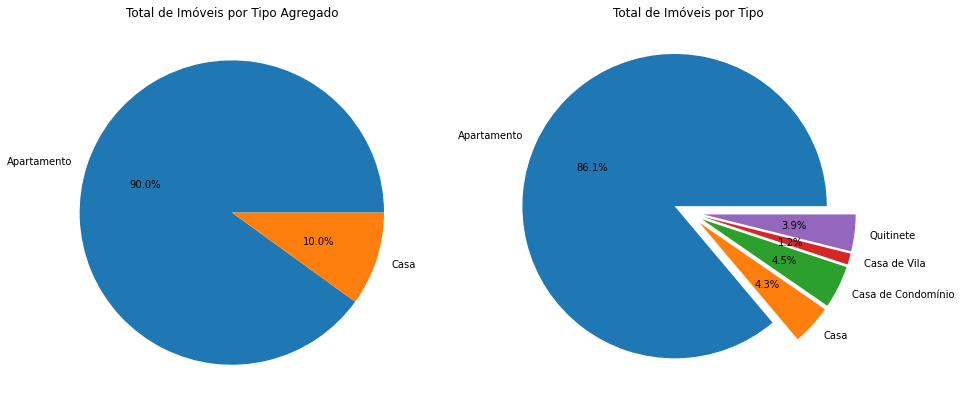

In [21]:
area = plt.figure()
g1 = area.add_subplot(1, 2, 1)
g2 = area.add_subplot(1, 2, 2)
grupo1 = dados.groupby('Tipo Agregado')['Valor']
label = grupo1.count().index
valores = grupo1.count().values
g1.pie(valores, labels=label, autopct='%1.1f%%')
g1.set_title('Total de Imóveis por Tipo Agregado')
grupo2 = dados.groupby('Tipo')['Valor']
label = grupo2.count().index
valores = grupo2.count().values
g2.pie(valores, labels=label, autopct='%1.1f%%', explode=(.1, .1, .1, .1, .1))
g2.set_title('Total de Imóveis por Tipo')